In [1]:
import pandas as pd

from keras import regularizers, activations
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, ZeroPadding2D

from Utils import *

np.random.seed(7)

2024-07-09 13:23:00.670017: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 13:23:00.727960: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 13:23:00.728942: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 13:23:01.741068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## CNN model

#### Import data (ESC-10)

In [2]:
# import the .pkl file
df = pd.read_pickle("esc10.pkl")
print('Shape of the dataframe:', df.shape)
mel_shape = df.mel_spectrogram[0].shape
print('Shape of a mel spectrogram:', mel_shape)
df.head()

Shape of the dataframe: (1600, 4)
Shape of a mel spectrogram: (128, 156)


,mel_spectrogram,target,fold,original
0,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,True
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
2,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
4,"[[0.9999999, 0.8515761, 0.36829472, 0.39175928...",0,1,True


#### Define the initialization model function

In [3]:
def init_model():
    model = Sequential()
        
    #layer-1
    model.add(Conv2D(filters=24, kernel_size=5, input_shape=(mel_shape[0], mel_shape[1], 1),   # 128, 156 -> 124, 152
                      kernel_regularizer=regularizers.l2(1e-3), padding='valid'))
    model.add(ZeroPadding2D(padding=(1, 2)))  # 124, 152 -> 126, 156
    model.add(MaxPooling2D(pool_size=(3, 3), strides=3))  # 126, 156 -> 42, 52
    model.add(Activation(activations.relu))
    
    #layer-2
    model.add(Conv2D(filters=36, kernel_size=5, padding='valid', kernel_regularizer=regularizers.l2(1e-3))) # 42, 52 -> 38, 48
    model.add(ZeroPadding2D(padding=(1, 0))) # 38, 48 -> 40, 48
    model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # 40, 48 -> 20, 24
    model.add(Activation(activations.relu))
    
    #layer-3
    model.add(Conv2D(filters=48, kernel_size=3, padding='valid')) # 20, 24 -> 18, 22
    model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # 18, 22 -> 9, 11
    model.add(Activation(activations.relu))
        
    # flatten
    model.add(Flatten()) # 9, 11 -> 9*11*48 = 4752
    
    #layer-4 (1st dense layer)
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    
    #layer-5 (2nd dense layer)
    model.add(Dense(10, activation='softmax'))

    # compile
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model 

#### Model Summary

In [4]:
model = init_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 152, 24)      624       
                                                                 
 zero_padding2d (ZeroPaddin  (None, 126, 156, 24)      0         
 g2D)                                                            
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 52, 24)        0         
 D)                                                              
                                                                 
 activation (Activation)     (None, 42, 52, 24)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 48, 36)        21636     
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 40, 48, 36)        0

#### Training and results

Fold 1/5

Pre-training accuracy: 17.499999701976776 %
Epoch 1/20
40/40 [==============================] - 15s 346ms/step - loss: 1.6437 - accuracy: 0.4164 - val_loss: 1.2968 - val_accuracy: 0.5625
Epoch 2/20
40/40 [==============================] - 13s 337ms/step - loss: 0.9921 - accuracy: 0.6453 - val_loss: 1.0686 - val_accuracy: 0.5875
Epoch 3/20
40/40 [==============================] - 15s 368ms/step - loss: 0.6786 - accuracy: 0.7789 - val_loss: 1.1674 - val_accuracy: 0.7000
Epoch 4/20
40/40 [==============================] - 13s 320ms/step - loss: 0.4440 - accuracy: 0.8531 - val_loss: 1.2269 - val_accuracy: 0.6875
Epoch 5/20
40/40 [==============================] - 13s 334ms/step - loss: 0.2888 - accuracy: 0.9070 - val_loss: 1.3322 - val_accuracy: 0.6750
Epoch 6/20
40/40 [==============================] - 13s 337ms/step - loss: 0.2707 - accuracy: 0.9242 - val_loss: 1.6612 - val_accuracy: 0.6125
Epoch 7/20
40/40 [==============================] - 13s 334ms/step - loss: 0.2440 - accu

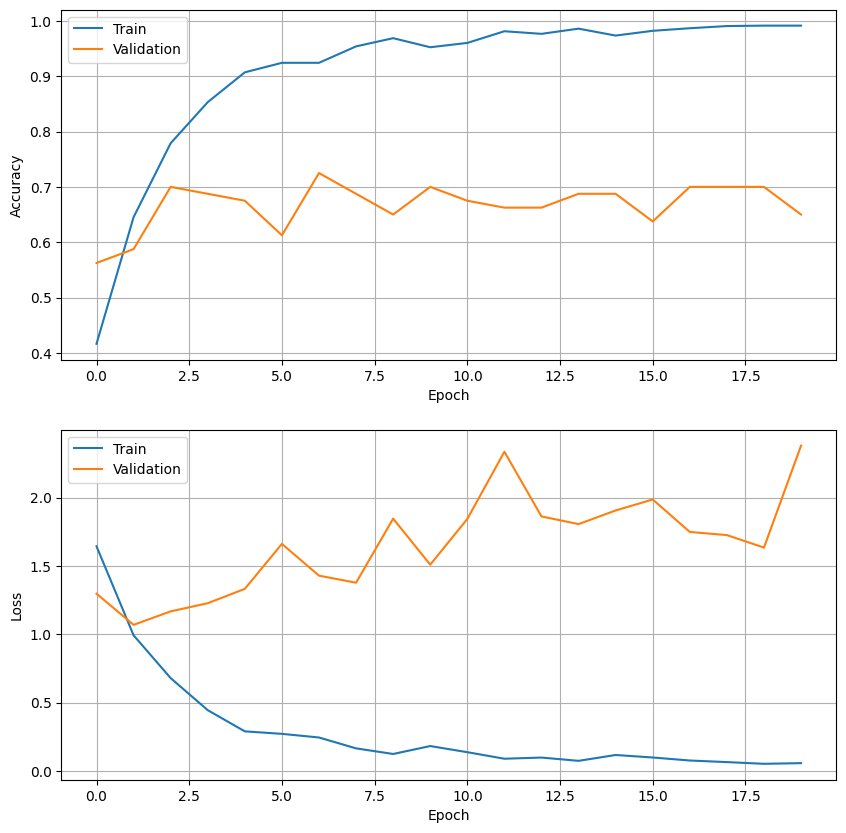

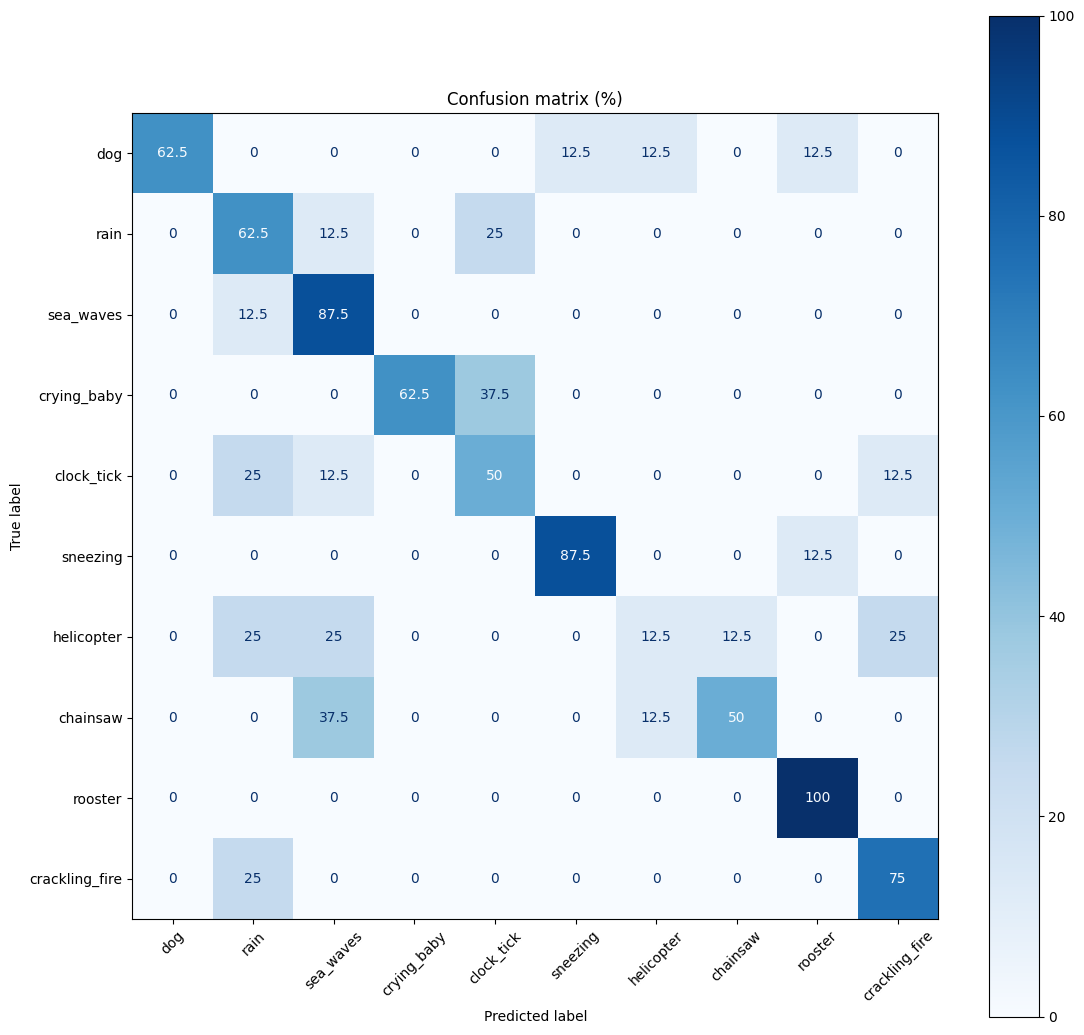

Fold 2/5

Pre-training accuracy: 8.749999850988388 %
Epoch 1/20
40/40 [==============================] - 14s 333ms/step - loss: 1.6609 - accuracy: 0.4055 - val_loss: 1.1033 - val_accuracy: 0.6625
Epoch 2/20
40/40 [==============================] - 13s 333ms/step - loss: 1.0094 - accuracy: 0.6539 - val_loss: 0.9139 - val_accuracy: 0.6750
Epoch 3/20
40/40 [==============================] - 13s 331ms/step - loss: 0.7522 - accuracy: 0.7359 - val_loss: 0.8616 - val_accuracy: 0.6625
Epoch 4/20
40/40 [==============================] - 13s 331ms/step - loss: 0.5234 - accuracy: 0.8188 - val_loss: 0.7754 - val_accuracy: 0.7625
Epoch 5/20
40/40 [==============================] - 13s 331ms/step - loss: 0.4051 - accuracy: 0.8617 - val_loss: 0.5761 - val_accuracy: 0.7625
Epoch 6/20
40/40 [==============================] - 13s 331ms/step - loss: 0.3482 - accuracy: 0.8891 - val_loss: 0.6351 - val_accuracy: 0.8125
Epoch 7/20
40/40 [==============================] - 13s 333ms/step - loss: 0.2522 - accur

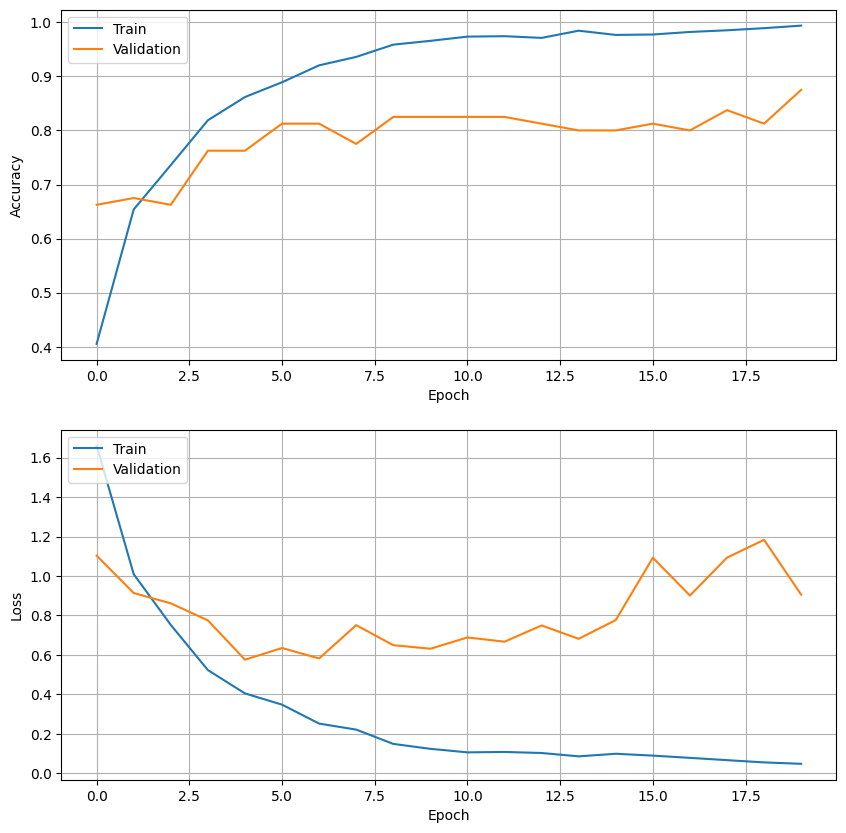

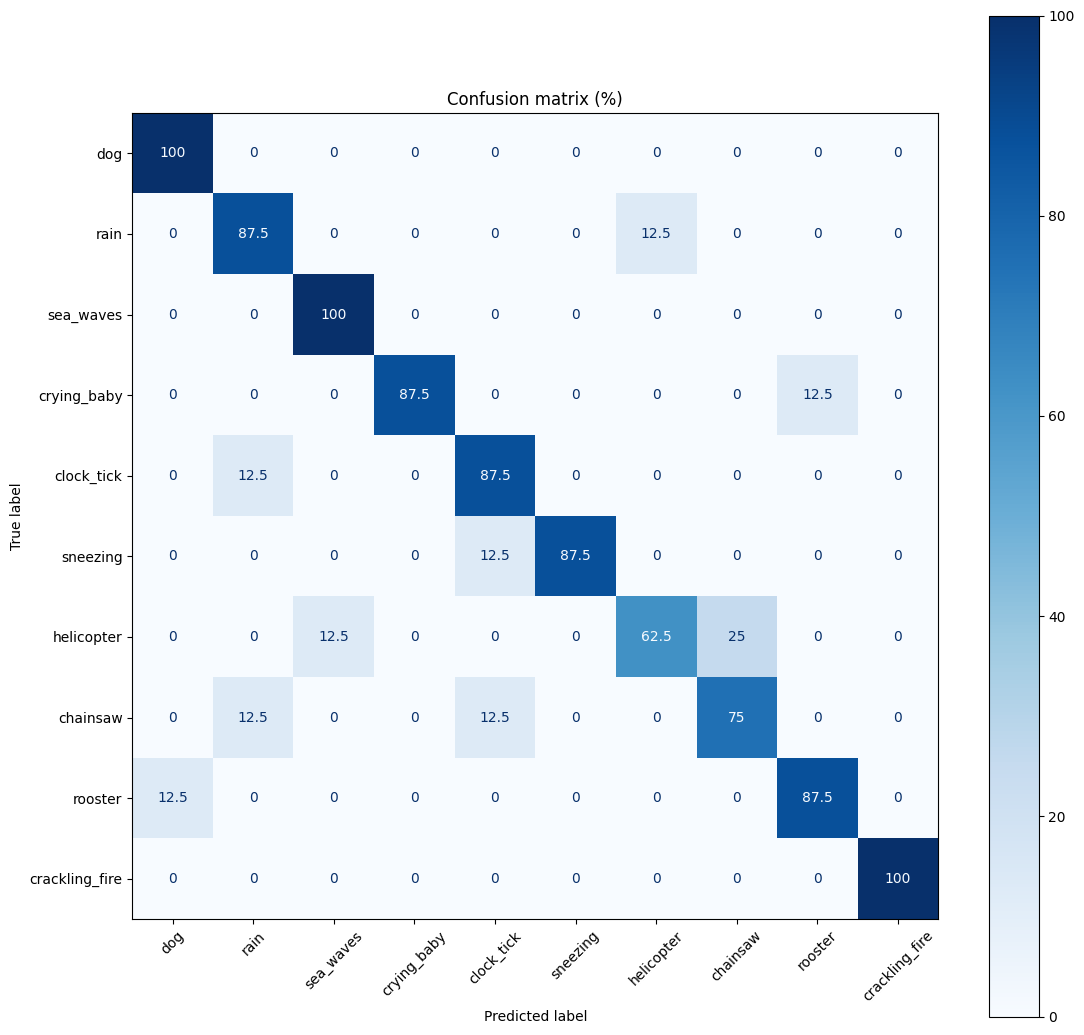

Fold 3/5

Pre-training accuracy: 10.000000149011612 %
Epoch 1/20
40/40 [==============================] - 14s 335ms/step - loss: 1.6763 - accuracy: 0.4047 - val_loss: 1.4634 - val_accuracy: 0.4750
Epoch 2/20
40/40 [==============================] - 13s 333ms/step - loss: 1.0997 - accuracy: 0.6203 - val_loss: 1.2266 - val_accuracy: 0.6250
Epoch 3/20
40/40 [==============================] - 13s 332ms/step - loss: 0.6892 - accuracy: 0.7789 - val_loss: 1.2622 - val_accuracy: 0.5625
Epoch 4/20
40/40 [==============================] - 13s 332ms/step - loss: 0.4719 - accuracy: 0.8578 - val_loss: 1.0637 - val_accuracy: 0.6750
Epoch 5/20
40/40 [==============================] - 13s 333ms/step - loss: 0.3432 - accuracy: 0.8883 - val_loss: 1.3019 - val_accuracy: 0.6250
Epoch 6/20
40/40 [==============================] - 14s 344ms/step - loss: 0.3203 - accuracy: 0.9031 - val_loss: 1.2347 - val_accuracy: 0.6875
Epoch 7/20
40/40 [==============================] - 13s 327ms/step - loss: 0.2451 - accu

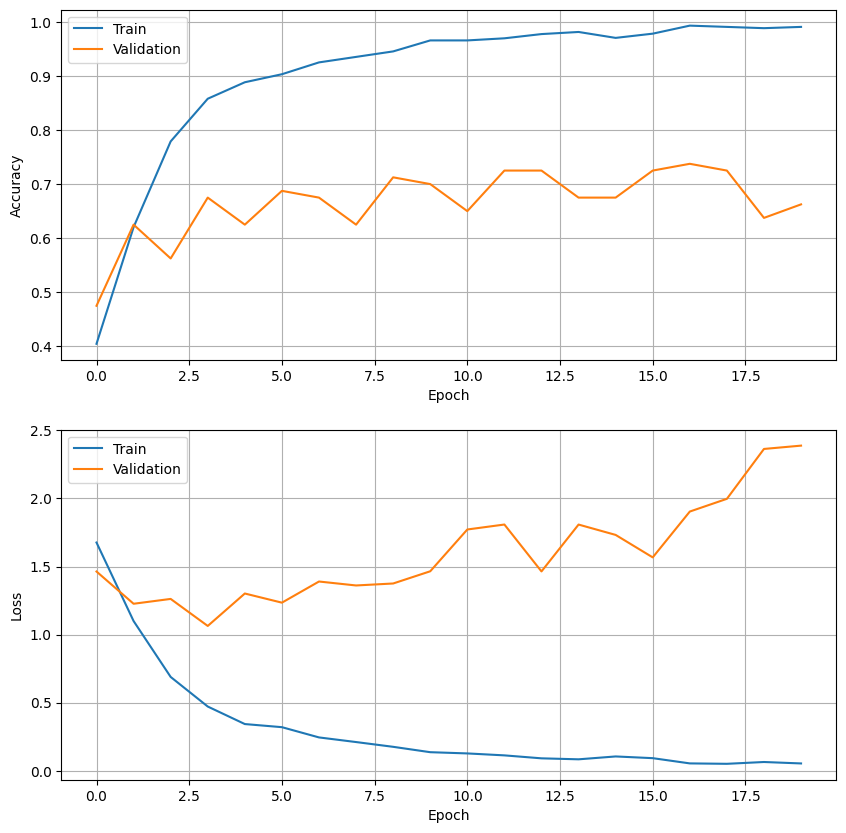

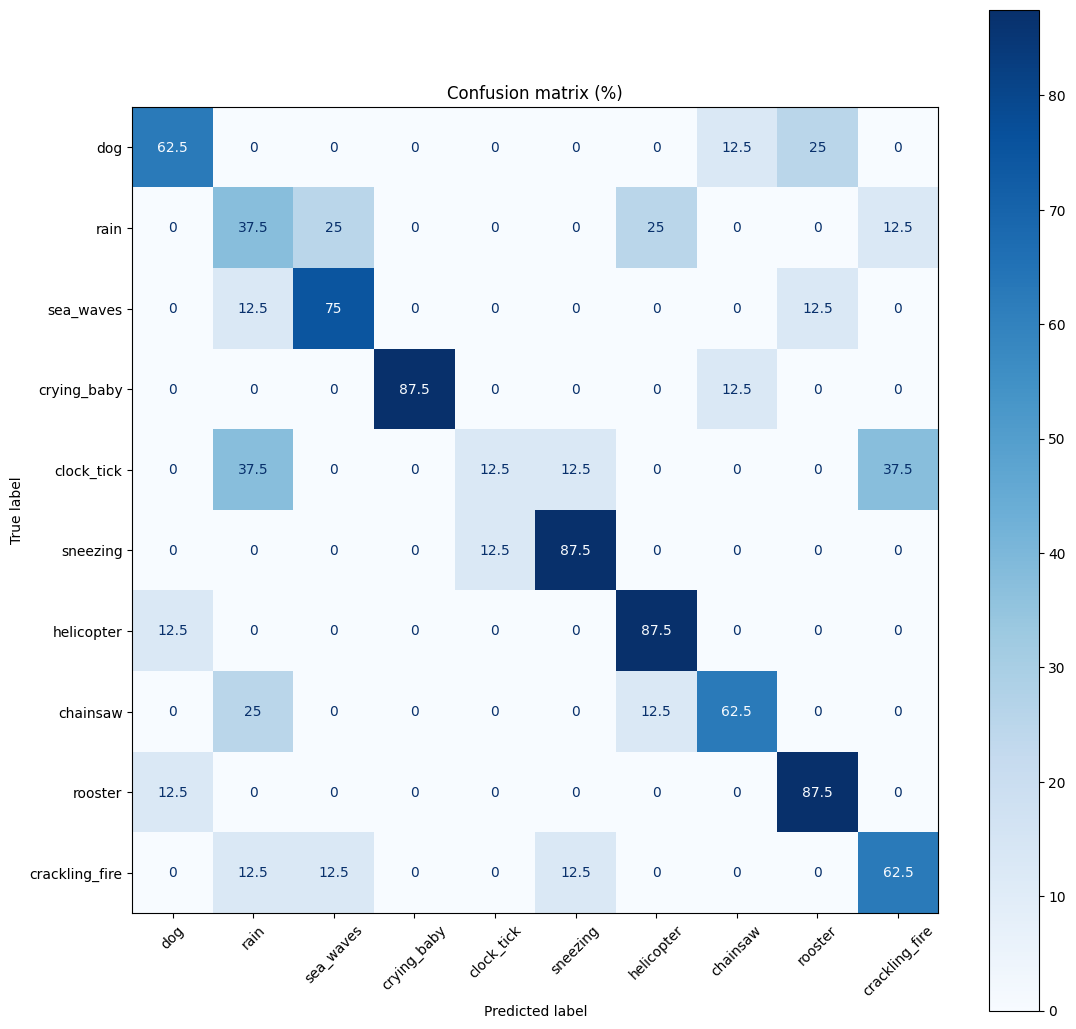

Fold 4/5

Pre-training accuracy: 15.000000596046448 %
Epoch 1/20
40/40 [==============================] - 14s 327ms/step - loss: 1.6746 - accuracy: 0.4062 - val_loss: 1.2426 - val_accuracy: 0.5500
Epoch 2/20
40/40 [==============================] - 13s 323ms/step - loss: 1.0209 - accuracy: 0.6500 - val_loss: 0.9062 - val_accuracy: 0.6500
Epoch 3/20
40/40 [==============================] - 13s 325ms/step - loss: 0.6871 - accuracy: 0.7727 - val_loss: 0.8926 - val_accuracy: 0.7250
Epoch 4/20
40/40 [==============================] - 13s 326ms/step - loss: 0.4761 - accuracy: 0.8547 - val_loss: 0.8821 - val_accuracy: 0.7125
Epoch 5/20
40/40 [==============================] - 13s 331ms/step - loss: 0.3995 - accuracy: 0.8758 - val_loss: 0.9525 - val_accuracy: 0.7125
Epoch 6/20
40/40 [==============================] - 13s 326ms/step - loss: 0.2742 - accuracy: 0.9219 - val_loss: 0.9498 - val_accuracy: 0.7250
Epoch 7/20
40/40 [==============================] - 13s 325ms/step - loss: 0.2239 - accu

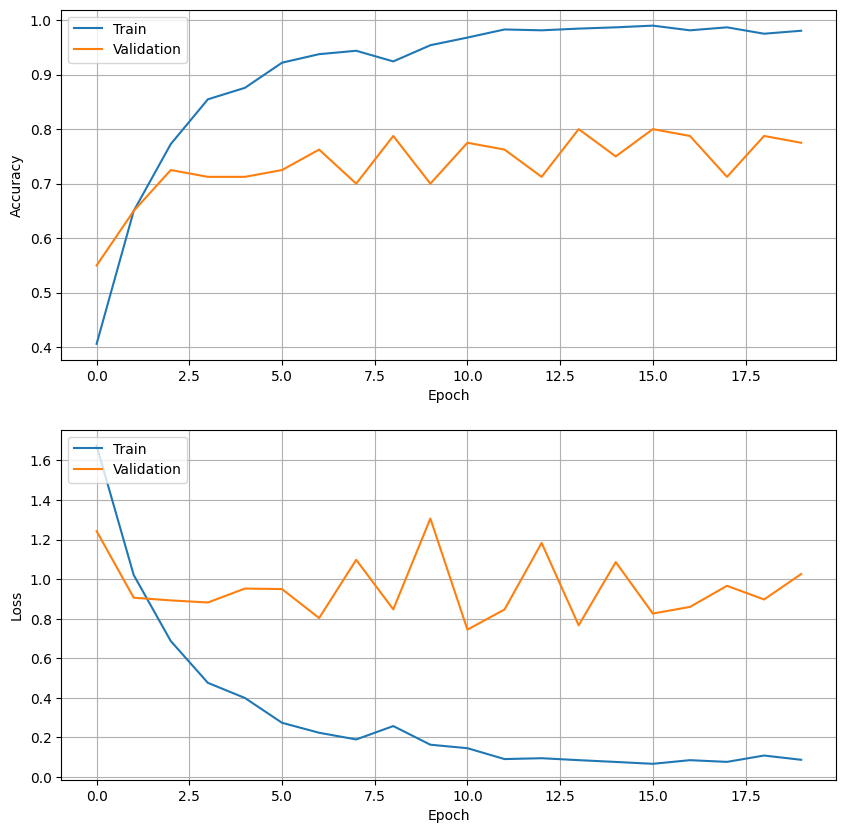

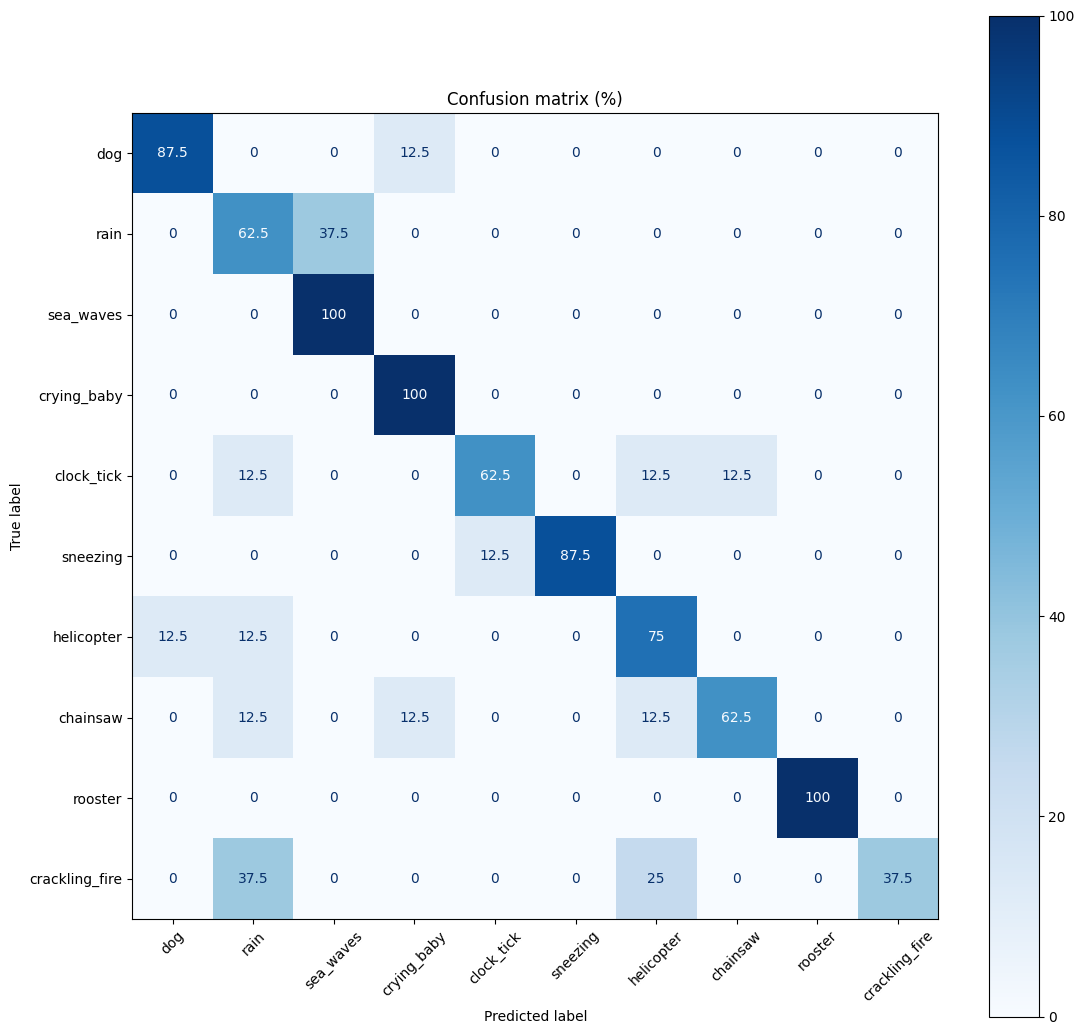

Fold 5/5

Pre-training accuracy: 15.000000596046448 %
Epoch 1/20
40/40 [==============================] - 14s 326ms/step - loss: 1.6081 - accuracy: 0.4109 - val_loss: 1.3623 - val_accuracy: 0.5875
Epoch 2/20
40/40 [==============================] - 13s 325ms/step - loss: 1.0079 - accuracy: 0.6508 - val_loss: 1.2317 - val_accuracy: 0.6500
Epoch 3/20
40/40 [==============================] - 13s 326ms/step - loss: 0.7262 - accuracy: 0.7484 - val_loss: 1.1591 - val_accuracy: 0.6750
Epoch 4/20
40/40 [==============================] - 13s 323ms/step - loss: 0.5115 - accuracy: 0.8289 - val_loss: 1.2371 - val_accuracy: 0.7250
Epoch 5/20
40/40 [==============================] - 13s 327ms/step - loss: 0.4548 - accuracy: 0.8336 - val_loss: 1.4071 - val_accuracy: 0.6500
Epoch 6/20
40/40 [==============================] - 13s 325ms/step - loss: 0.3162 - accuracy: 0.9062 - val_loss: 1.2371 - val_accuracy: 0.7500
Epoch 7/20
40/40 [==============================] - 13s 324ms/step - loss: 0.2310 - accu

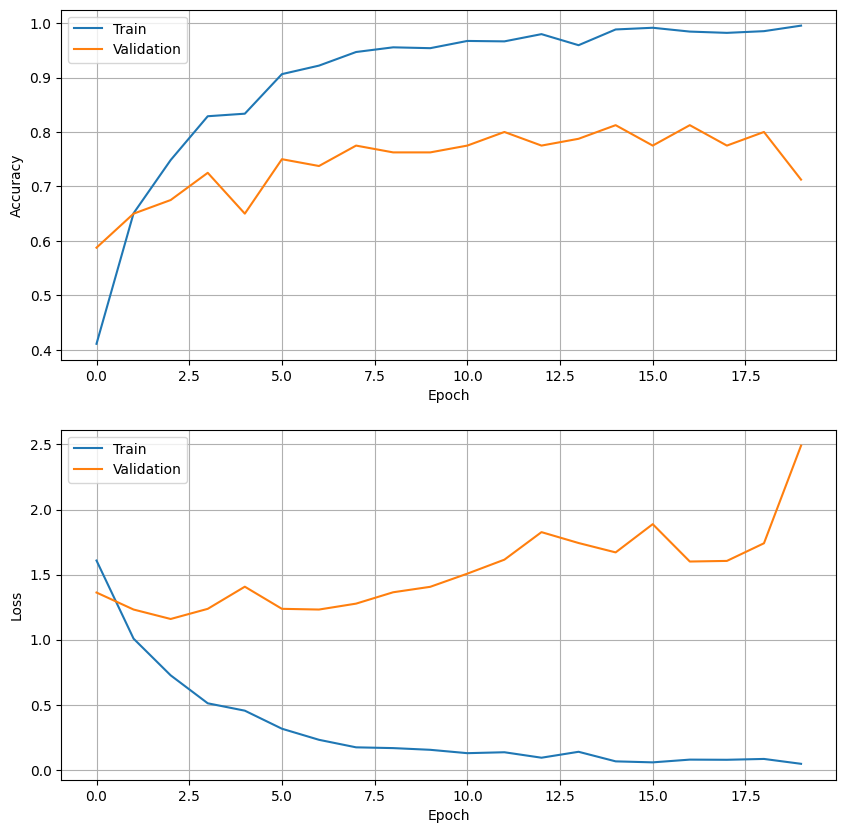

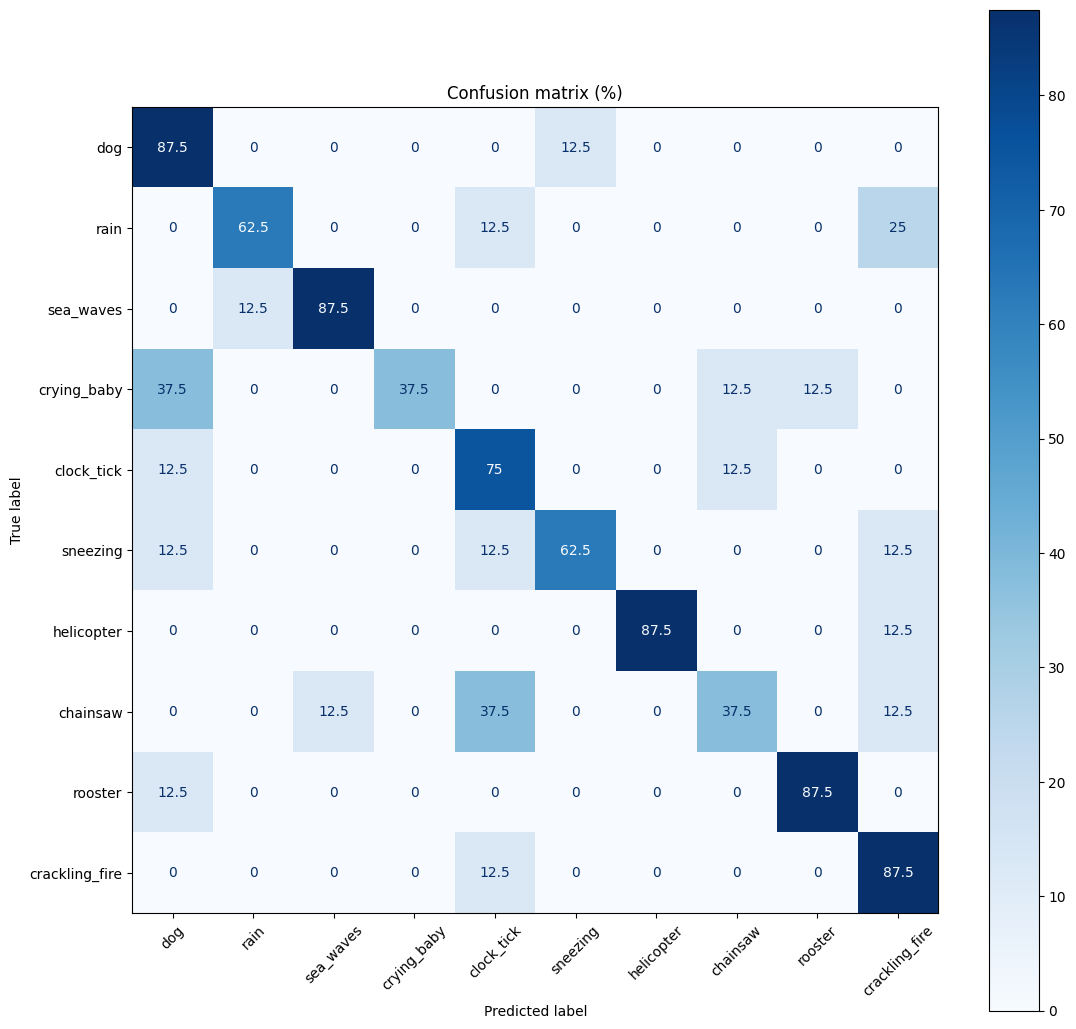

Average results:

Classification training results:
Average training accuracy: 0.99 ± 0.01
Average validation accuracy: 0.73 ± 0.08
Average training loss: 0.06 ± 0.01
Average validation loss: 1.84 ± 0.71

Average (total) training time: 264.84 ± 3.10 s

Plotting average results:

Classification training result plots:


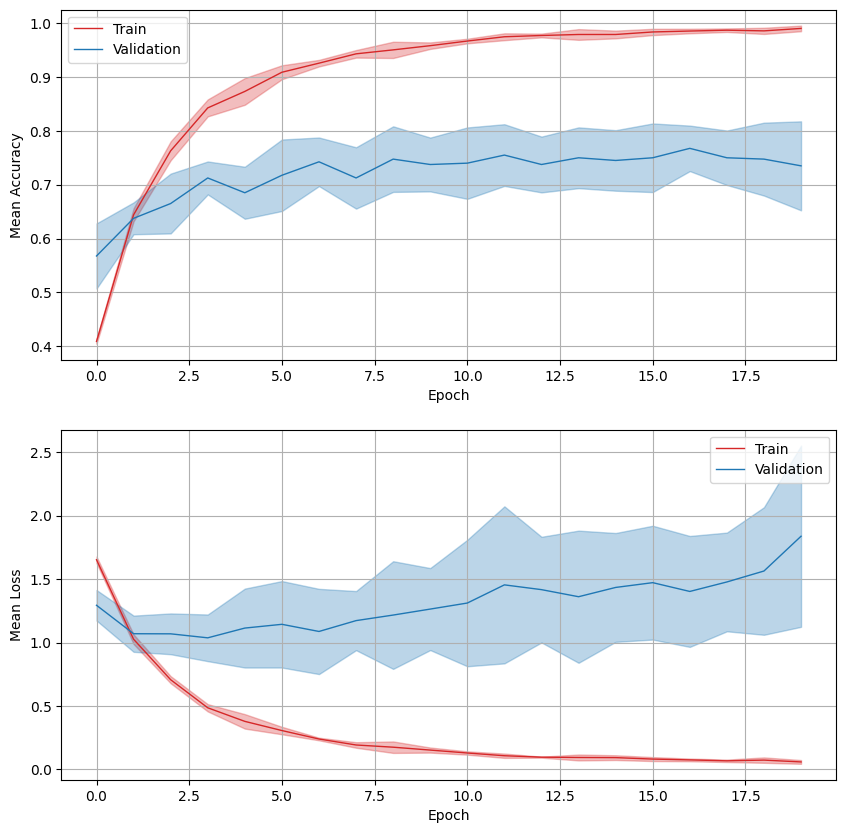

Average confusion matrix:



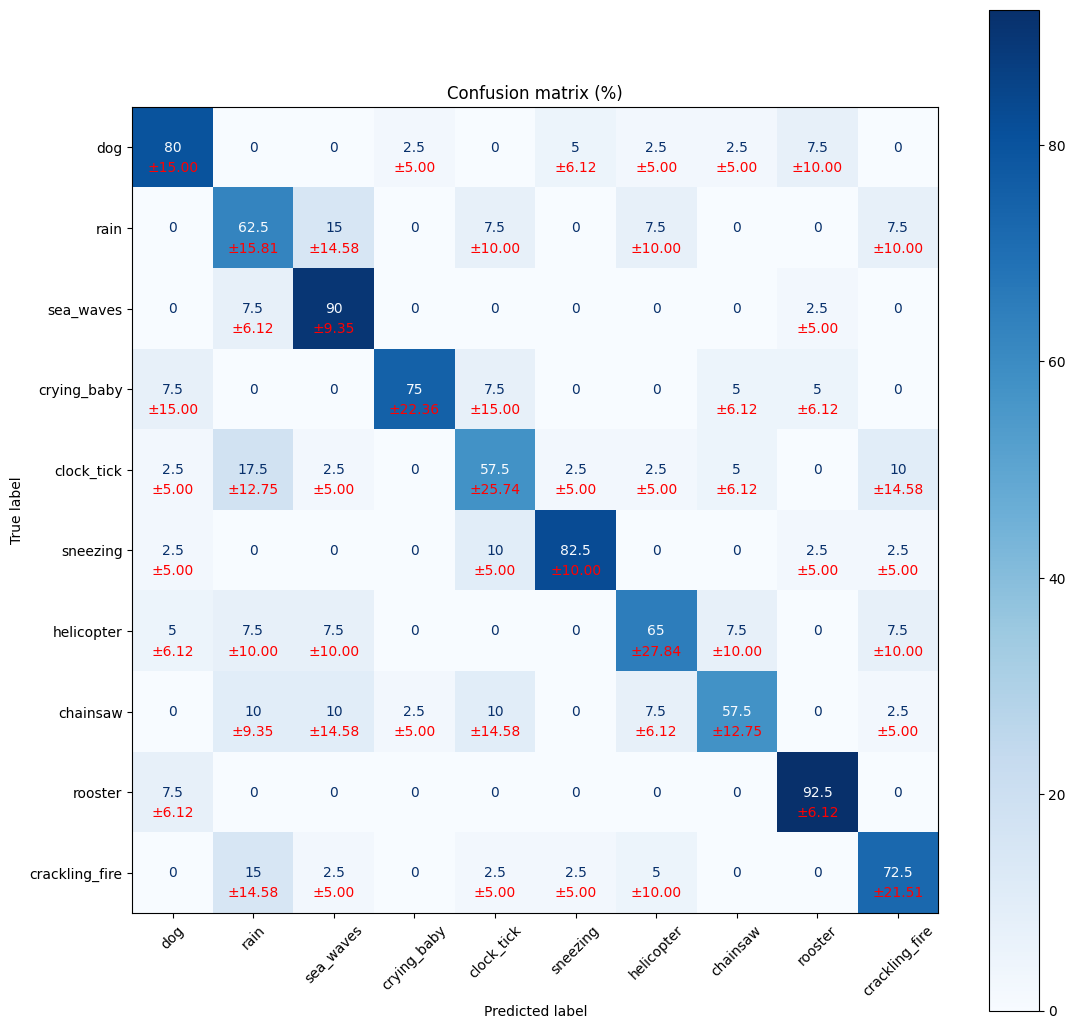

In [5]:
x_dim = (mel_shape[0], mel_shape[1], 1)
history = cross_validation(df, init_model, X_dim=x_dim, n_folds=5, epochs=20, num_batch_size=32, verbose=1)